In [0]:
!unzip basicshapes.zip

In [0]:
import os
from glob import glob

In [0]:
glob('shapes/triangles/*')[:10]

['shapes/triangles/drawing(96).png',
 'shapes/triangles/drawing(2).png',
 'shapes/triangles/drawing(95).png',
 'shapes/triangles/drawing(78).png',
 'shapes/triangles/drawing(13).png',
 'shapes/triangles/drawing(11).png',
 'shapes/triangles/drawing(41).png',
 'shapes/triangles/drawing(79).png',
 'shapes/triangles/drawing(36).png',
 'shapes/triangles/drawing(18).png']

In [0]:
import imageio
import matplotlib.pyplot as plt

In [0]:
temp = imageio.imread('shapes/triangles/drawing(96).png')

In [0]:
temp.shape

(28, 28, 3)

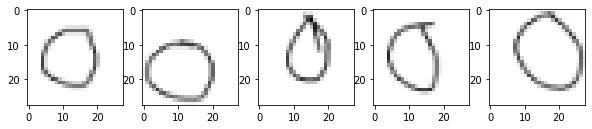

In [0]:
fig = plt.figure(figsize = (10,2))
for i in range(1,6):
    ax = plt.subplot(1,5,i)
    img= imageio.imread(glob('shapes/circles/*')[i])
    plt.imshow(img)



In [0]:
!rm -r /content/shapes/shapes

In [0]:
!mkdir shapes_val
!mkdir shapes_val/circles
!mkdir shapes_val/squares
!mkdir shapes_val/triangles

In [0]:
squares = glob('shapes/squares/*')
circles = glob('shapes/circles/*')
triangles = glob('shapes/triangles/*')

In [0]:
len(triangles)

80

In [0]:
for img in squares[-20:]:
    os.replace(img, img.replace('shapes', 'shapes_val'))
for img in circles[-20:]:
    os.replace(img, img.replace('shapes', 'shapes_val'))
for img in triangles[-20:]:
    os.replace(img, img.replace('shapes', 'shapes_val'))

In [0]:
!pip install --upgrade tensorflow keras

In [0]:
import keras

Using TensorFlow backend.


In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from keras.callbacks import EarlyStopping

In [0]:
classifier = Sequential()

# First Convolution Layer
classifier.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28,28,3), activation='relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))

# Second Convolution Layer
classifier.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))

# Flattening
classifier.add(Flatten())

# Full Connection (Hidden Layers)
classifier.add(Dense(64, activation='relu'))

# Output Layer
classifier.add(Dense(3, activation='softmax'))

In [0]:
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
classifier.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                51264     
_________________________________________________________________
dense_6 (Dense)              (None, 3)                

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

train_set = train_datagen.flow_from_directory(
        '/content/shapes',
        target_size=(28, 28),
        batch_size=32,
        class_mode='categorical')

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_set = validation_datagen.flow_from_directory(
        '/content/shapes_val',
        target_size=(28, 28),
        batch_size=32,
        class_mode='categorical')

Found 240 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [0]:
train_set.class_indices

{'circles': 0, 'squares': 1, 'triangles': 2}

In [0]:
classifier.fit_generator(
        train_set,
        steps_per_epoch=240,
        epochs=20,
        validation_data=validation_set,
        validation_steps=60)

Epoch 1/20
240/240 [==============================] - 15s 63ms/step - loss: 0.7580 - accuracy: 0.6669 - val_loss: 0.4920 - val_accuracy: 0.7833
Epoch 2/20
240/240 [==============================] - 15s 62ms/step - loss: 0.1958 - accuracy: 0.9383 - val_loss: 0.2453 - val_accuracy: 0.8167
Epoch 3/20
240/240 [==============================] - 15s 62ms/step - loss: 0.0730 - accuracy: 0.9804 - val_loss: 0.3864 - val_accuracy: 0.8333
Epoch 4/20
240/240 [==============================] - 15s 62ms/step - loss: 0.0460 - accuracy: 0.9864 - val_loss: 0.6786 - val_accuracy: 0.8500
Epoch 5/20
240/240 [==============================] - 15s 62ms/step - loss: 0.0294 - accuracy: 0.9917 - val_loss: 0.8272 - val_accuracy: 0.8667
Epoch 6/20
240/240 [==============================] - 15s 62ms/step - loss: 0.0238 - accuracy: 0.9929 - val_loss: 0.6475 - val_accuracy: 0.8500
Epoch 7/20
240/240 [==============================] - 15s 62ms/step - loss: 0.0161 - accuracy: 0.9953 - val_loss: 1.3125 - val_accuracy:

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from PIL import Image

In [0]:
circle_png = Image.open('/content/drive/My Drive/datasets/circle.png')
sq = Image.open('/content/drive/My Drive/datasets/squares.png')
tr = Image.open('/content/drive/My Drive/datasets/Triangle.png')

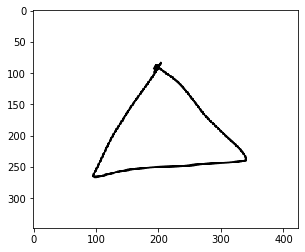

In [0]:
plt.imshow(tr)

In [0]:
circle_png = circle_png.convert('RGB')
sq = sq.convert('RGB')
tr = tr.convert('RGB')

In [0]:
circle_png = circle_png.resize((28,28), Image.ANTIALIAS)
sq = sq.resize((28,28), Image.ANTIALIAS)
tr = tr.resize((28,28), Image.ANTIALIAS)

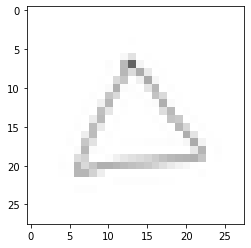

In [0]:
plt.imshow(tr)

In [0]:
import pandas as pd

In [0]:
classifier.predict(np.array(tr).reshape(1,28,28,3))

array([[0., 0., 1.]], dtype=float32)

In [0]:
train_set.class_indices

{'circles': 0, 'squares': 1, 'triangles': 2}

----------------------------------------------

In [1]:
import numpy as np

In [9]:
classes = {'circles': 0, 'squares': 1, 'triangles': 2}
classes

{'circles': 0, 'squares': 1, 'triangles': 2}

In [17]:
answers = np.array([[0.45, 0.35, 0.2], [0.1, 0.3, 0.6], [0.35, 0.55, 0.1]])

In [11]:
answers = [np.argmax(ans) for ans in answers]

In [12]:
answers

[0, 2, 1]

In [13]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()

In [15]:
lb.fit(np.array([0,1,2]))

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [16]:
lb.classes_

array([0, 1, 2])

In [19]:
answers = np.array([[0.45, 0.35, 0.2], [0.1, 0.3, 0.6], [0.35, 0.55, 0.1]])

In [20]:
lb.inverse_transform(answers)

array([0, 2, 1])